<a href="https://colab.research.google.com/github/torchflash/MMAI831-Team-Project/blob/main/Tony/Prediction%20model%20results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url = '/content/drive/MyDrive/Dataset.xlsx'
df = pd.read_excel(url,sheet_name='Format')

In [4]:
df

,User,Q 1,Q 2,Q 3,Q 4,Q 5,Q 6,Q 7,Q 8,Q 9,...,20-6,20-7,20-8,20-9,20-10,20-11,20-12,20-13,20-14,20-15
0,U0001,1,2,-2,0,-1,0,-2,2,-1,...,1,1,1,1,1,1,1,1,1,1
1,U0002,2,0,2,-2,-1,-1,2,0,2,...,1,2,2,1,1,1,1,1,1,1
2,U0003,-1,2,0,2,0,2,-1,2,-1,...,1,1,1,1,1,1,1,1,4,1
3,U0004,1,1,-1,0,-1,0,-1,1,0,...,1,1,1,1,1,1,1,1,1,1
4,U0005,1,2,1,1,-1,0,0,2,0,...,1,1,1,1,1,1,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,U0116,1,-2,1,-1,-1,-1,2,1,2,...,1,1,4,1,1,1,1,1,1,1
116,U0117,1,2,-2,1,0,-1,-1,2,-1,...,1,1,2,1,1,3,2,1,2,1
117,U0118,1,1,2,1,0,-1,0,0,1,...,3,3,2,1,2,2,1,1,3,1
118,U0119,1,1,-1,-1,-1,1,1,1,1,...,3,3,3,2,3,3,3,3,3,3


In [5]:
df['Openness to Experience'] = df[['Q 1', 'Q 6']].sum(axis=1)
df['Conscientiousness'] = df[['Q 2', 'Q 7']].sum(axis=1)
df['Extraversion'] = df[['Q 3', 'Q 8']].sum(axis=1)
df['Agreeableness'] = df[['Q 4', 'Q 9']].sum(axis=1)
df['Neuroticism'] = df[['Q 5', 'Q 10']].sum(axis=1)

df = df.drop(df.columns[1:33], axis=1)

df

,User,Gender,Age,Paypal,Type of Job,Weekly working hours,Income,Home country,Home town,Cap/Zip-Code,...,20-11,20-12,20-13,20-14,20-15,Openness to Experience,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,U0001,F,62,hidden@comcast.net,Housewife/Househusband,Full Time,1,United States of America,Apollo,15613,...,1,1,1,1,1,1,0,0,-1,0
1,U0002,F,26,hidden@gmail.com,Contract employment,Full Time,1,United States of America,Chicago,60638,...,1,1,1,1,1,1,2,2,0,0
2,U0003,M,22,hidden@uwosh.edu,Contract employment,Full Time,1,United States of America,Greenville,54942,...,1,1,1,4,1,1,1,2,1,2
3,U0004,F,24,hidden@hotmail.co.uk,Student,Part Time,1,Great Britain,London,NW1 1EU,...,1,1,1,1,1,1,0,0,0,0
4,U0005,F,34,hidden@email.cz,Contract employment,Full Time,1,Czech Republic,Prague,10000,...,1,1,1,3,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,U0116,F,28,hidden@yahoo.com,Contract employment,Full Time,2,United States of America,Colorado,80031,...,1,1,1,1,1,0,0,2,1,-2
116,U0117,F,55,hidden@hotmail.com,Self-employment,Full Time,2,United States of America,Bellflower,90706,...,3,2,1,2,1,0,1,0,0,-1
117,U0118,F,18,hidden@yahoo.com,Student,Full Time,2,United States of America,San Mateo,94401-2727,...,2,1,1,3,1,0,1,2,2,1
118,U0119,F,61,hidden@hush.ai,Temporary,Part Time,1,Canada,Toronto,M5S1R8,...,3,3,3,3,3,2,2,0,0,0


In [6]:
df = df.drop(columns=['Home town', 'Cap/Zip-Code', 'Countries visited'])

In [7]:
df

,User,Gender,Age,Paypal,Type of Job,Weekly working hours,Income,Home country,Timepass,Fave Sports,...,20-11,20-12,20-13,20-14,20-15,Openness to Experience,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,U0001,F,62,hidden@comcast.net,Housewife/Househusband,Full Time,1,United States of America,Internet,I do not like Sports,...,1,1,1,1,1,1,0,0,-1,0
1,U0002,F,26,hidden@gmail.com,Contract employment,Full Time,1,United States of America,Internet,Nothing,...,1,1,1,1,1,1,2,2,0,0
2,U0003,M,22,hidden@uwosh.edu,Contract employment,Full Time,1,United States of America,Sports,"Team sports (Footbal, Baseball, Rugby, ...)",...,1,1,1,4,1,1,1,2,1,2
3,U0004,F,24,hidden@hotmail.co.uk,Student,Part Time,1,Great Britain,Internet,"Individual sports‎ (Tennis, Archery, ...)",...,1,1,1,1,1,1,0,0,0,0
4,U0005,F,34,hidden@email.cz,Contract employment,Full Time,1,Czech Republic,Sports,"Individual sports‎ (Tennis, Archery, ...)",...,1,1,1,3,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,U0116,F,28,hidden@yahoo.com,Contract employment,Full Time,2,United States of America,Reading,I do not like Sports,...,1,1,1,1,1,0,0,2,1,-2
116,U0117,F,55,hidden@hotmail.com,Self-employment,Full Time,2,United States of America,Internet,"Olympic sports‎, Equestrian sports‎, Motor spo...",...,3,2,1,2,1,0,1,0,0,-1
117,U0118,F,18,hidden@yahoo.com,Student,Full Time,2,United States of America,Reading,I do not like Sports,...,2,1,1,3,1,0,1,2,2,1
118,U0119,F,61,hidden@hush.ai,Temporary,Part Time,1,Canada,Movie,Other,...,3,3,3,3,3,2,2,0,0,0


In [8]:
unique_categories = df['Most visited websites'].unique()
print(unique_categories)

['Media (Books, DVD, CD/DVD Music) sites, Grocery &amp; beverages sites, Pet supplies sites'
 'Toys &amp; games sites, Console &amp; video games sites'
 'Sports &amp; outdoor sites, Media (Books, DVD, CD/DVD Music) sites'
 'Stationery &amp; office supplies sites, Clothing &amp; shoes sites, Health &amp; Beauty sites, Home stuffs sites'
 'Consumer electronics sites, Clothing &amp; shoes sites, Outdoor Living sites, Home stuffs sites, Jewellery &amp; watches sites, Computer software sites, Sports &amp; outdoor sites'
 'Clothing &amp; shoes sites' 'Media (Books, DVD, CD/DVD Music) sites'
 'Console &amp; video games sites, Clothing &amp; shoes sites, Toys &amp; games sites'
 'Clothing &amp; shoes sites, Health &amp; Beauty sites, Jewellery &amp; watches sites'
 'Grocery &amp; beverages sites, Clothing &amp; shoes sites, Health &amp; Beauty sites'
 'Computer software sites, Automotive sites' 'Sports &amp; outdoor sites'
 'Clothing &amp; shoes sites, Console &amp; video games sites, Health &

In [9]:
df['Most visited websites'] = df['Most visited websites'].str.replace("amp;", "")
df['Most visited websites'] = df['Most visited websites'].str.replace(" sites", "")
df['Most visited websites'] = df['Most visited websites'].str.replace("Books, DVD, CD/DVD Music", "BMVD")


In [10]:
df['Most visited websites'][22]

'Media (BMVD), Dating'

In [11]:
categories = pd.read_excel(url,sheet_name='Categories')
categories = categories.transpose()
unique_values = categories.iloc[1].unique().tolist()
unique_values.insert(0,'Clothing & Shoes')
unique_values = ['Media' if x == 'Media (BMVD)' else x for x in unique_values]
unique_values = ['Home' if x == 'Kitchen & Home' else x for x in unique_values]
unique_values = ['Office' if x == 'Office Products' else x for x in unique_values]
unique_values = ['Dating' if x == 'Dating Sites' else x for x in unique_values]
unique_values = ['Sports' if x == 'Sports & Outdoors' else x for x in unique_values]
unique_values = ['living' if x == 'Garden & Outdoor living' else x for x in unique_values]
unique_values = ['Tools' if x == 'DIY & Tools' else x for x in unique_values]

unique_values

['Clothing & Shoes',
 'Automotive',
 'Baby Products',
 'Health & Beauty',
 'Media',
 'Consumer Electronics',
 'Console & Video Games',
 'Tools',
 'living',
 'Grocery',
 'Home',
 'Betting',
 'Jewellery & Watches',
 'Musical Instruments',
 'Office',
 'Pet Supplies',
 'Computer Software',
 'Sports',
 'Toys & Games',
 'Dating']

In [12]:
for category in unique_values:
    df[category] = df['Most visited websites'].str.contains(category, case=False).astype(int)

In [13]:
df['Dating']

0      0
1      0
2      0
3      0
4      0
      ..
115    0
116    0
117    0
118    0
119    0
Name: Dating, Length: 120, dtype: int64

In [14]:
column_counts = df.iloc[:, -20:].apply(pd.Series.value_counts)

# Print the counts
print(column_counts)

   Clothing & Shoes  Automotive  Baby Products  Health & Beauty  Media  \
0                70         113            114               73     79   
1                50           7              6               47     41   

   Consumer Electronics  Console & Video Games  Tools  living  Grocery  Home  \
0                    98                     92    109     107      105   104   
1                    22                     28     11      13       15    16   

   Betting  Jewellery & Watches  Musical Instruments  Office  Pet Supplies  \
0      111                  105                  115     111           108   
1        9                   15                    5       9            12   

   Computer Software  Sports  Toys & Games  Dating  
0                104     105           108     111  
1                 16      15            12       9  


# **Prediction**

In [15]:
for i in range(1, 21):
    start_col = f'{i}-1'  # Start column name
    end_col = f'{i}-15'  # End column name
    new_feature = f'{unique_values[i-1]} scores'  # New feature name
    
    df[new_feature] = df.loc[:, start_col:end_col].mean(axis=1)
    df[new_feature] = df[new_feature].apply(lambda x: 0 if x < 3 else 1)

# Print the updated DataFrame with new features
print(df)

      User Gender  Age                Paypal             Type of Job  \
0    U0001      F   62    hidden@comcast.net  Housewife/Househusband   
1    U0002      F   26      hidden@gmail.com     Contract employment   
2    U0003      M   22      hidden@uwosh.edu     Contract employment   
3    U0004      F   24  hidden@hotmail.co.uk                 Student   
4    U0005      F   34       hidden@email.cz     Contract employment   
..     ...    ...  ...                   ...                     ...   
115  U0116      F   28      hidden@yahoo.com     Contract employment   
116  U0117      F   55    hidden@hotmail.com         Self-employment   
117  U0118      F   18      hidden@yahoo.com                 Student   
118  U0119      F   61        hidden@hush.ai               Temporary   
119  U0120      M   33      hidden@gmail.com              Consulting   

    Weekly working hours  Income              Home country  Timepass  \
0              Full Time       1  United States of America  Int

In [ ]:
column_names = df.columns.tolist()

# Print the column names
column_names

In [17]:
# Get the list of column names to delete
columns_to_delete = [f'{i}-{j}' for i in range(1, 21) for j in range(1, 16)]


# Delete the columns from the DataFrame
df = df.drop(columns_to_delete, axis=1)

# Print the updated DataFrame
print(df)

      User Gender  Age                Paypal             Type of Job  \
0    U0001      F   62    hidden@comcast.net  Housewife/Househusband   
1    U0002      F   26      hidden@gmail.com     Contract employment   
2    U0003      M   22      hidden@uwosh.edu     Contract employment   
3    U0004      F   24  hidden@hotmail.co.uk                 Student   
4    U0005      F   34       hidden@email.cz     Contract employment   
..     ...    ...  ...                   ...                     ...   
115  U0116      F   28      hidden@yahoo.com     Contract employment   
116  U0117      F   55    hidden@hotmail.com         Self-employment   
117  U0118      F   18      hidden@yahoo.com                 Student   
118  U0119      F   61        hidden@hush.ai               Temporary   
119  U0120      M   33      hidden@gmail.com              Consulting   

    Weekly working hours  Income              Home country  Timepass  \
0              Full Time       1  United States of America  Int

# **Prediction**

In [18]:
random_seed = 18

# Split the dataframe into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=random_seed)


In [45]:
Labels = ['Clothing & Shoes scores', 'Automotive scores', 'Baby Products scores', 'Health & Beauty scores', 'Media scores', 'Consumer Electronics scores', 'Console & Video Games scores', 'Tools scores', 'living scores', 'Grocery scores', 'Home scores', 'Betting scores', 'Jewellery & Watches scores', 'Musical Instruments scores', 'Office scores', 'Pet Supplies scores', 'Computer Software scores', 'Sports scores', 'Toys & Games scores', 'Dating scores']


In [46]:
useful_feature = ['Gender',
 'Age',
 'Type of Job',
 'Weekly working hours',
 'Income',
 'Home country',
 'Timepass',
 'Openness to Experience',
 'Conscientiousness',
 'Extraversion',
 'Agreeableness',
 'Neuroticism'
]

In [47]:
y_train = train_df[Labels]
y_test = test_df[Labels]
X_train = train_df[useful_feature]
X_test = test_df[useful_feature]

In [48]:
y_train

,Clothing & Shoes scores,Automotive scores,Baby Products scores,Health & Beauty scores,Media scores,Consumer Electronics scores,Console & Video Games scores,Tools scores,living scores,Grocery scores,Home scores,Betting scores,Jewellery & Watches scores,Musical Instruments scores,Office scores,Pet Supplies scores,Computer Software scores,Sports scores,Toys & Games scores,Dating scores
33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,1,1,1,0
2,0,1,0,0,1,1,1,1,0,1,1,1,0,0,1,0,1,0,0,0
92,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
102,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,1,0,0,1,1,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1
62,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
from sklearn.preprocessing import OrdinalEncoder

# Combine X_train and X_test for consistent encoding
combined_data = pd.concat([X_train, X_test], axis=0)

# Identify the columns with string values
string_columns = combined_data.select_dtypes(include=[object]).columns

# Create a copy of X_train and X_test
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Create an instance of OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder on the combined data
encoder.fit(combined_data[string_columns])

# Transform X_train and X_test using the fitted encoder
X_train_encoded[string_columns] = encoder.transform(X_train[string_columns])
X_test_encoded[string_columns] = encoder.transform(X_test[string_columns])

# Print the encoded data
print("X_train Encoded:")
print(X_train_encoded)
print()
print("X_test Encoded:")
print(X_test_encoded)

X_train Encoded:
     Gender  Age  Type of Job  Weekly working hours  Income  Home country  \
33      1.0   35          1.0                   0.0       1          11.0   
78      1.0   18          4.0                   0.0       2          10.0   
2       1.0   22          1.0                   0.0       1          11.0   
92      0.0   37          4.0                   0.0       1          11.0   
102     0.0   28          1.0                   0.0       3          11.0   
..      ...  ...          ...                   ...     ...           ...   
49      0.0   68          6.0                   1.0       1          11.0   
62      1.0   35          4.0                   0.0       2           0.0   
69      0.0   31          5.0                   0.0       1           0.0   
19      1.0   22          1.0                   0.0       1          11.0   
42      1.0   33          1.0                   0.0       1          11.0   

     Timepass  Openness to Experience  Conscientiousness  

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Create a dictionary to store the accuracies
accuracies = {}

# Iterate over each column in y_train
for column in y_train.columns:
    # Create a Random Forest classifier
    rf = RandomForestClassifier(random_state=18)
    
    # Fit the classifier on X_train and the current column in y_train
    rf.fit(X_train_encoded, y_train[column])
    
    # Make predictions on X_test
    y_pred = rf.predict(X_test_encoded)
    
    # Calculate the accuracy for the current column
    accuracy = accuracy_score(y_test[column], y_pred)
    
    # Store the accuracy in the dictionary
    accuracies[column] = accuracy

# Create a dataframe from the accuracies dictionary
accuracy_df = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Random Forest Accuracy'])

# Print the dataframe
print(accuracy_df)

                              Random Forest Accuracy
Clothing & Shoes scores                     0.916667
Automotive scores                           0.916667
Baby Products scores                        0.875000
Health & Beauty scores                      0.833333
Media scores                                0.708333
Consumer Electronics scores                 0.833333
Console & Video Games scores                0.750000
Tools scores                                0.958333
living scores                               0.875000
Grocery scores                              0.708333
Home scores                                 0.958333
Betting scores                              1.000000
Jewellery & Watches scores                  0.916667
Musical Instruments scores                  0.916667
Office scores                               0.875000
Pet Supplies scores                         0.916667
Computer Software scores                    0.958333
Sports scores                               0.

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Iterate over each column in y_train
for column in y_train.columns:
    # Create a Logistic Regression classifier
    logistic_reg = LogisticRegression(random_state=18)
    
    # Fit the classifier on X_train and the current column in y_train
    logistic_reg.fit(X_train_encoded, y_train[column])
    
    # Make predictions on X_test
    y_pred = logistic_reg.predict(X_test_encoded)
    
    # Calculate the accuracy for the current column
    accuracy = accuracy_score(y_test[column], y_pred)
    
    # Add the accuracy to the existing accuracy_df dataframe
    accuracy_df.loc[column, 'Logistic Accuracy'] = accuracy

accuracy_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Random Forest Accuracy,Logistic Accuracy
Clothing & Shoes scores,0.916667,0.875000
Automotive scores,0.916667,0.875000
Baby Products scores,0.875000,0.791667
Health & Beauty scores,0.833333,0.833333
Media scores,0.708333,0.666667
Consumer Electronics scores,0.833333,0.708333
Console & Video Games scores,0.750000,0.625000
Tools scores,0.958333,0.958333
living scores,0.875000,0.875000
Grocery scores,0.708333,0.750000


In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Iterate over each column in y_train
for column in y_train.columns:
    # Create an SVM classifier
    svm = SVC(random_state=18)
    
    # Fit the classifier on X_train and the current column in y_train
    svm.fit(X_train_encoded, y_train[column])
    
    # Make predictions on X_test
    y_pred = svm.predict(X_test_encoded)
    
    # Calculate the accuracy for the current column
    accuracy = accuracy_score(y_test[column], y_pred)
    
    # Add the accuracy to the existing accuracy_df dataframe
    accuracy_df.loc[column, 'SVM Accuracy'] = accuracy

# Print the updated accuracy_df dataframe
accuracy_df

,Random Forest Accuracy,Logistic Accuracy,SVM Accuracy
Clothing & Shoes scores,0.916667,0.875000,0.916667
Automotive scores,0.916667,0.875000,0.916667
Baby Products scores,0.875000,0.791667,0.875000
Health & Beauty scores,0.833333,0.833333,0.833333
Media scores,0.708333,0.666667,0.708333
Consumer Electronics scores,0.833333,0.708333,0.875000
Console & Video Games scores,0.750000,0.625000,0.833333
Tools scores,0.958333,0.958333,0.958333
living scores,0.875000,0.875000,0.875000
Grocery scores,0.708333,0.750000,0.708333


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test
# Assuming you have the existing accuracy_df dataframe

# Iterate over each column in y_train
for column in y_train.columns:
    # Create a Decision Tree classifier
    decision_tree = DecisionTreeClassifier(random_state=18)
    decision_tree.fit(X_train_encoded, y_train[column])
    y_pred_dt = decision_tree.predict(X_test_encoded)
    accuracy_dt = accuracy_score(y_test[column], y_pred_dt)
    accuracy_df.loc[column, 'Decision Tree Accuracy'] = accuracy_dt

    # Create a K-Nearest Neighbors classifier
    knn = KNeighborsClassifier()
    knn.fit(X_train_encoded, y_train[column])
    y_pred_knn = knn.predict(X_test_encoded)
    accuracy_knn = accuracy_score(y_test[column], y_pred_knn)
    accuracy_df.loc[column, 'KNN Accuracy'] = accuracy_knn

    # Create an AdaBoost classifier
    adaboost = AdaBoostClassifier(random_state=18)
    adaboost.fit(X_train_encoded, y_train[column])
    y_pred_ab = adaboost.predict(X_test_encoded)
    accuracy_ab = accuracy_score(y_test[column], y_pred_ab)
    accuracy_df.loc[column, 'AdaBoost Accuracy'] = accuracy_ab

# Print the updated accuracy_df dataframe
accuracy_df

,Random Forest Accuracy,Logistic Accuracy,SVM Accuracy,Decision Tree Accuracy,KNN Accuracy,AdaBoost Accuracy
Clothing & Shoes scores,0.916667,0.875000,0.916667,0.791667,0.916667,0.916667
Automotive scores,0.916667,0.875000,0.916667,0.833333,0.916667,0.875000
Baby Products scores,0.875000,0.791667,0.875000,0.875000,0.875000,0.833333
Health & Beauty scores,0.833333,0.833333,0.833333,0.791667,0.750000,0.791667
Media scores,0.708333,0.666667,0.708333,0.625000,0.708333,0.708333
Consumer Electronics scores,0.833333,0.708333,0.875000,0.666667,0.875000,0.625000
Console & Video Games scores,0.750000,0.625000,0.833333,0.708333,0.666667,0.625000
Tools scores,0.958333,0.958333,0.958333,0.833333,0.958333,0.875000
living scores,0.875000,0.875000,0.875000,0.750000,0.833333,0.875000
Grocery scores,0.708333,0.750000,0.708333,0.791667,0.708333,0.750000


# **Jobtype Information**

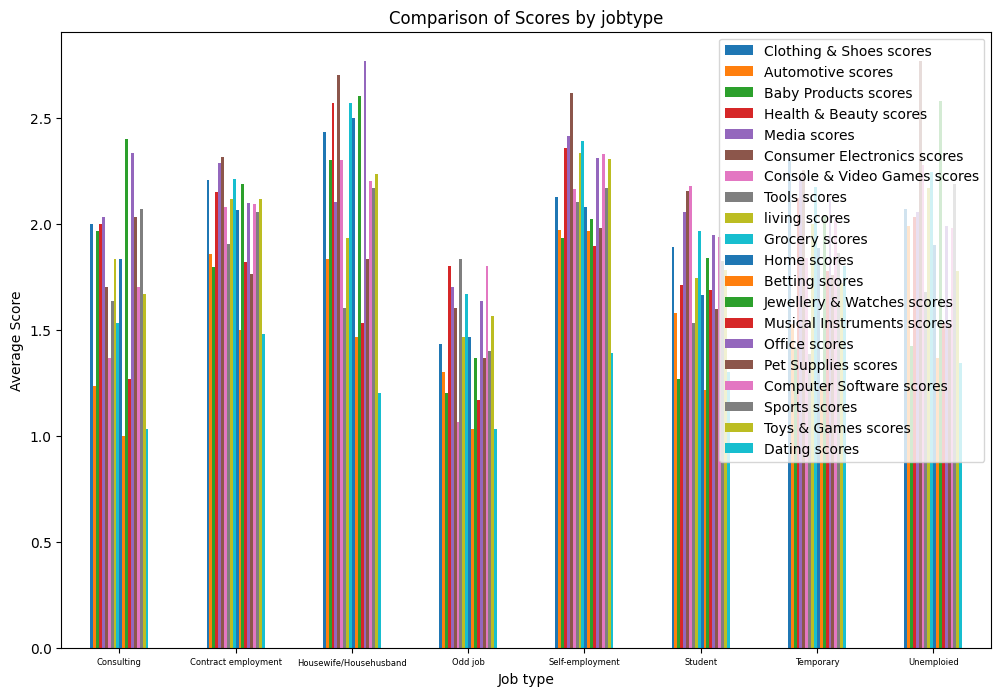

Highest Scores:

jobtype: Consulting
Jewellery & Watches scores    2.400000
Office scores                 2.333333
Sports scores                 2.066667
Media scores                  2.033333
Pet Supplies scores           2.033333
Name: Consulting, dtype: float64

jobtype: Contract employment
Consumer Electronics scores    2.314530
Media scores                   2.285470
Grocery scores                 2.210256
Clothing & Shoes scores        2.203419
Jewellery & Watches scores     2.184615
Name: Contract employment, dtype: float64

jobtype: Housewife/Househusband
Office scores                  2.766667
Consumer Electronics scores    2.700000
Jewellery & Watches scores     2.600000
Health & Beauty scores         2.566667
Grocery scores                 2.566667
Name: Housewife/Househusband, dtype: float64

jobtype: Odd job
Tools scores                1.833333
Health & Beauty scores      1.800000
Computer Software scores    1.800000
Media scores                1.700000
Grocery scores     

In [ ]:
jobtype_scores = df.groupby('Type of Job')[[ 'Clothing & Shoes scores',
 'Automotive scores',
 'Baby Products scores',
 'Health & Beauty scores',
 'Media scores',
 'Consumer Electronics scores',
 'Console & Video Games scores',
 'Tools scores',
 'living scores',
 'Grocery scores',
 'Home scores',
 'Betting scores',
 'Jewellery & Watches scores',
 'Musical Instruments scores',
 'Office scores',
 'Pet Supplies scores',
 'Computer Software scores',
 'Sports scores',
 'Toys & Games scores',
 'Dating scores']].mean()


# Create a bar chart for the jobtype scores
jobtype_scores.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Scores by jobtype')
plt.xlabel('Job type')
plt.ylabel('Average Score')
plt.xticks(rotation=0, fontsize=6)
plt.legend(loc='upper right')
plt.show()

# Find the highest scores for each jobtype
highest_scores = {}
for jobtype in jobtype_scores.index:
    highest_scores[jobtype] = jobtype_scores.loc[jobtype].nlargest(5)

# Find the lowest scores for each jobtype
lowest_scores = {}
for jobtype in jobtype_scores.index:
    lowest_scores[jobtype] = jobtype_scores.loc[jobtype].nsmallest(5)

# Print the highest and lowest scores for each jobtype
print("Highest Scores:")
for jobtype, scores in highest_scores.items():
    print(f"\njobtype: {jobtype}")
    print(scores)

print("\nLowest Scores:")
for jobtype, scores in lowest_scores.items():
    print(f"\njobtype: {jobtype}")
    print(scores)

# **Gender information**

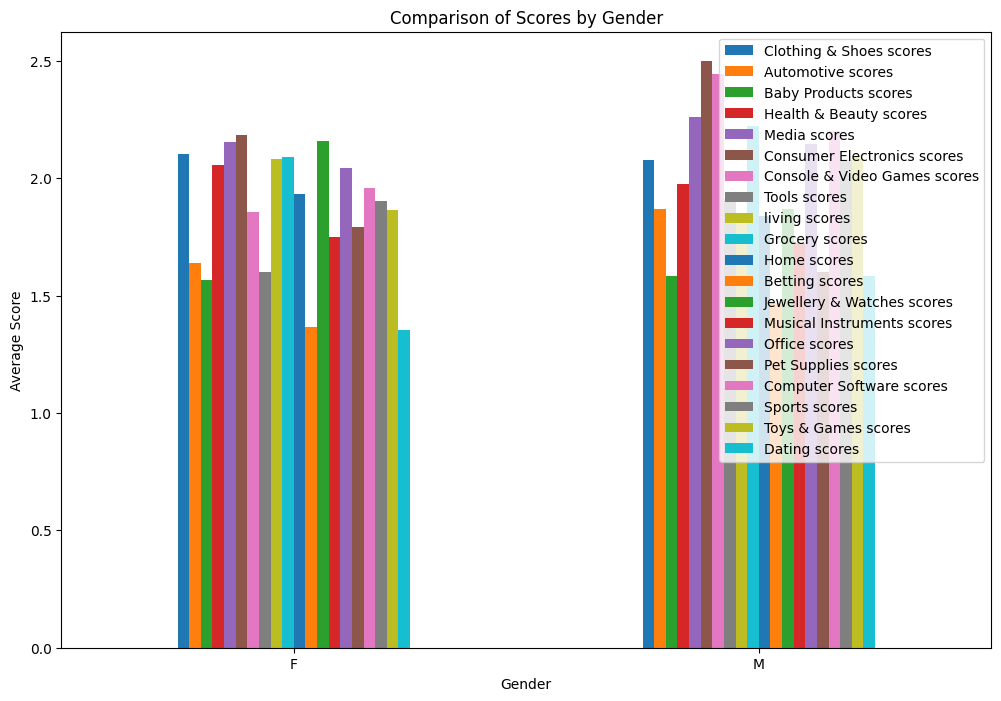

Highest Scores:

Gender: F
Consumer Electronics scores    2.184416
Jewellery & Watches scores     2.157576
Media scores                   2.153247
Clothing & Shoes scores        2.102165
Grocery scores                 2.089177
Name: F, dtype: float64

Gender: M
Consumer Electronics scores     2.499225
Console & Video Games scores    2.443411
Media scores                    2.258915
Grocery scores                  2.223256
Computer Software scores        2.203101
Name: M, dtype: float64

Lowest Scores:

Gender: F
Dating scores           1.352381
Betting scores          1.364502
Baby Products scores    1.567965
Tools scores            1.601732
Automotive scores       1.638961
Name: F, dtype: float64

Gender: M
Betting scores                1.468217
Dating scores                 1.582946
Baby Products scores          1.584496
Pet Supplies scores           1.600000
Musical Instruments scores    1.725581
Name: M, dtype: float64


In [ ]:
gender_scores = df.groupby('Gender')[[ 'Clothing & Shoes scores',
 'Automotive scores',
 'Baby Products scores',
 'Health & Beauty scores',
 'Media scores',
 'Consumer Electronics scores',
 'Console & Video Games scores',
 'Tools scores',
 'living scores',
 'Grocery scores',
 'Home scores',
 'Betting scores',
 'Jewellery & Watches scores',
 'Musical Instruments scores',
 'Office scores',
 'Pet Supplies scores',
 'Computer Software scores',
 'Sports scores',
 'Toys & Games scores',
 'Dating scores']].mean()


# Create a bar chart for the gender scores
gender_scores.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

# Find the highest scores for each gender
highest_scores = {}
for gender in gender_scores.index:
    highest_scores[gender] = gender_scores.loc[gender].nlargest(5)

# Find the lowest scores for each gender
lowest_scores = {}
for gender in gender_scores.index:
    lowest_scores[gender] = gender_scores.loc[gender].nsmallest(5)

# Print the highest and lowest scores for each gender
print("Highest Scores:")
for gender, scores in highest_scores.items():
    print(f"\nGender: {gender}")
    print(scores)

print("\nLowest Scores:")
for gender, scores in lowest_scores.items():
    print(f"\nGender: {gender}")
    print(scores)

ValueError: ignored

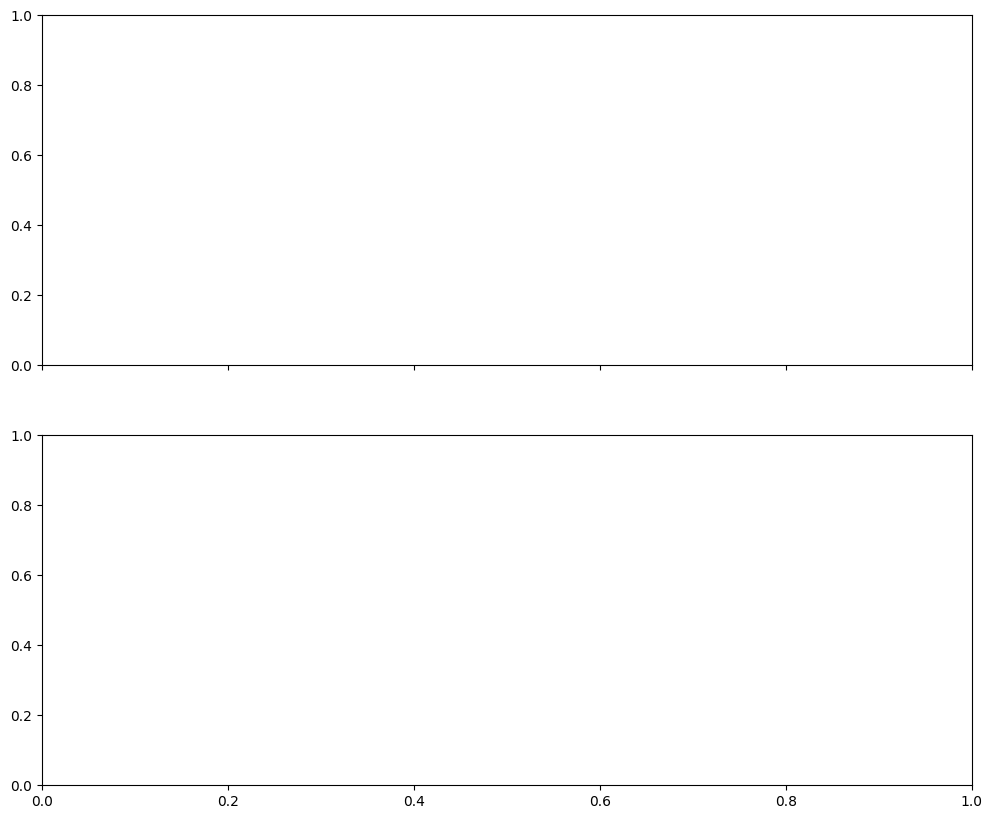

In [ ]:
# Specify the names of the one-hot encoded columns for website categories
category_columns = ['Clothing & Shoes', 'Automotive', 'Baby Products', 'Health & Beauty', 'Media', 'Consumer Electronics',
                    'Console & Video Games', 'Tools', 'living', 'Grocery', 'Home', 'Betting', 'Jewellery & Watches',
                    'Musical Instruments', 'Office', 'Pet Supplies', 'Computer Software', 'Sports', 'Toys & Games', 'Dating']

# Group the data by gender and calculate the sum of each category for each gender
gender_preference = df.groupby('Gender')[category_columns].sum()

# Get the top and bottom 3 preferences for each gender
top3 = gender_preference.apply(lambda x: x.nlargest(3), axis=1)
bottom3 = gender_preference.apply(lambda x: x.nsmallest(3), axis=1)

# Prepare the data for plotting
categories = np.arange(len(category_columns))
bar_width = 0.35

# Create a bar chart for the highest and lowest preferences for each gender
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Plot the top 3 preferences for each gender
axes[0].bar(categories, top3.loc['F'], bar_width, label='Female - Top 3')
axes[0].bar(categories, top3.loc['M'], bar_width, label='Male - Top 3')

# Plot the bottom 3 preferences for each gender
axes[1].bar(categories, bottom3.loc['F'], bar_width, label='Female - Bottom 3')
axes[1].bar(categories, bottom3.loc['M'], bar_width, label='Male - Bottom 3')

# Add labels, title, and legend
axes[1].set_xlabel('Category')
fig.suptitle('User Preference for Website Categories by Gender - Top and Bottom 3', fontsize=14)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')
axes[0].set_xticks(categories)
axes[0].set_xticklabels(category_columns, rotation=90)
axes[0].legend()
axes[1].legend()

plt.tight_layout()
plt.show()

# **Working hour information**

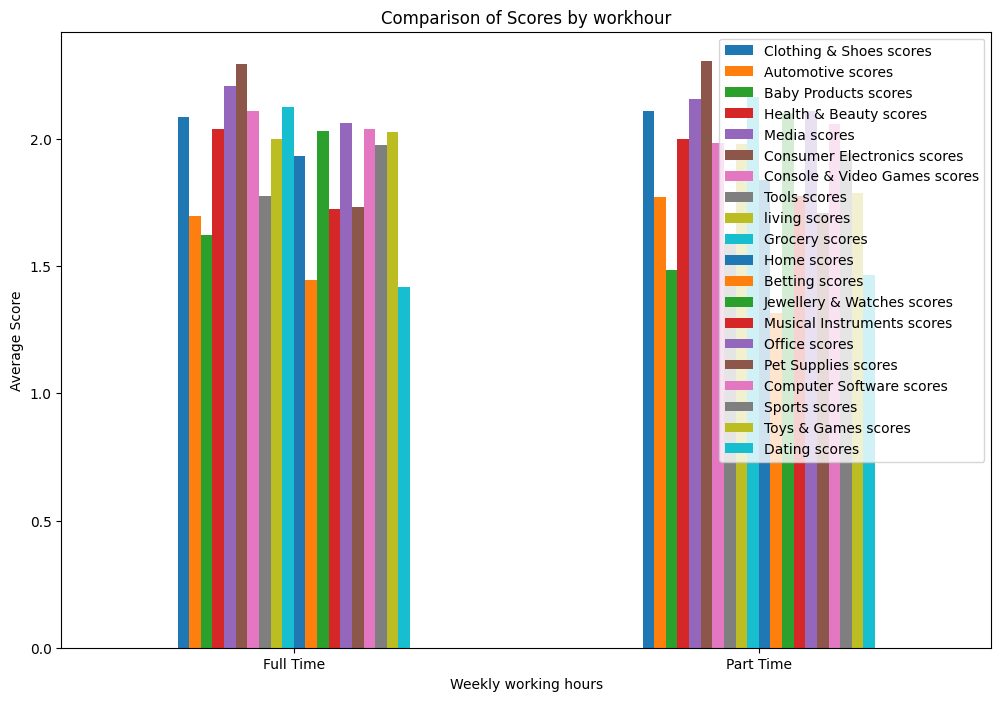

Highest Scores:

workhour: Full Time
Consumer Electronics scores     2.292827
Media scores                    2.209283
Grocery scores                  2.123207
Console & Video Games scores    2.110549
Clothing & Shoes scores         2.086076
Name: Full Time, dtype: float64

workhour: Part Time
Consumer Electronics scores    2.305691
Grocery scores                 2.164228
Media scores                   2.156098
Clothing & Shoes scores        2.108943
Office scores                  2.108943
Name: Part Time, dtype: float64

Lowest Scores:

workhour: Full Time
Dating scores                 1.418565
Betting scores                1.445570
Baby Products scores          1.621097
Automotive scores             1.695359
Musical Instruments scores    1.725738
Name: Full Time, dtype: float64

workhour: Part Time
Betting scores          1.317073
Dating scores           1.466667
Baby Products scores    1.482927
Tools scores            1.593496
Pet Supplies scores     1.707317
Name: Part Time, dtype:

In [ ]:
workhour_scores = df.groupby('Weekly working hours')[[ 'Clothing & Shoes scores',
 'Automotive scores',
 'Baby Products scores',
 'Health & Beauty scores',
 'Media scores',
 'Consumer Electronics scores',
 'Console & Video Games scores',
 'Tools scores',
 'living scores',
 'Grocery scores',
 'Home scores',
 'Betting scores',
 'Jewellery & Watches scores',
 'Musical Instruments scores',
 'Office scores',
 'Pet Supplies scores',
 'Computer Software scores',
 'Sports scores',
 'Toys & Games scores',
 'Dating scores']].mean()


# Create a bar chart for the workhour scores
workhour_scores.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Scores by workhour')
plt.xlabel('Weekly working hours')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

# Find the highest scores for each workhour
highest_scores = {}
for workhour in workhour_scores.index:
    highest_scores[workhour] = workhour_scores.loc[workhour].nlargest(5)

# Find the lowest scores for each workhour
lowest_scores = {}
for workhour in workhour_scores.index:
    lowest_scores[workhour] = workhour_scores.loc[workhour].nsmallest(5)

# Print the highest and lowest scores for each workhour
print("Highest Scores:")
for workhour, scores in highest_scores.items():
    print(f"\nworkhour: {workhour}")
    print(scores)

print("\nLowest Scores:")
for workhour, scores in lowest_scores.items():
    print(f"\nworkhour: {workhour}")
    print(scores)